![asd](https://camo.githubusercontent.com/b94f8fcd8e259a931c119c8926c2db0a0f675408/68747470733a2f2f6272616e64696e676d6f6e69746f722e706c2f77702d636f6e74656e742f75706c6f6164732f323031392f30312f6e65772d72656272616e64696e672d7367682d6e6f77652d6c6f676f2e706e67)

Szkoła Główna Handlowa w Warszawie

Projekt zaliczenowy



# Wstęp

Dane są związane z kampaniami marketingu bezpośredniego (rozmowy telefoniczne) Portugalskiej instytucji bankowej. Kampanie marketingowe opierały się na rozmowach telefonicznych.

Źródło danych: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Celem klasyfikacji jest przewidywanie, czy klient zapisze depozyt terminowy (zmienna y).

In [118]:
# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [119]:
# Import danych
# data = pd.read_csv('../Projekt/bank-additional-full.csv', sep=';')
data = pd.read_csv('../../data/data_slm/bank-additional-full.csv', sep=';')

In [120]:
data = data.loc[:, ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

# Eksploracja danych

## Informacje o zmiennych:

Dane klientów banku:
- age - wiek klienta (numeryczna)
- job - rodzaj pracy (kategoryczna:  'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown)
- marital - stan cywilny (kategoryczna:  'divorced','married','single','unknown')
- education - wykształcenie (kategoryczna: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- default - czy ma niespłacony kredyt? (kategoryczna: 'no','yes','unknown')
- housing - czy ma kredyt mieszkaniowy? (kategoryczna: 'no','yes','unknown')
- loan - czy ma osobistą pożyczkę? (kategoryczna: 'no','yes','unknown')

Zmienna objaśniana:
- y - czy klient zapisał się na lokatę terminową? (binarna: 'yes','no')

In [86]:
#Opis i typ zmiennych:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


## Eksploracja zmiennych:
Na następnych wykresach są pokazane charakterystyki zmiennych.

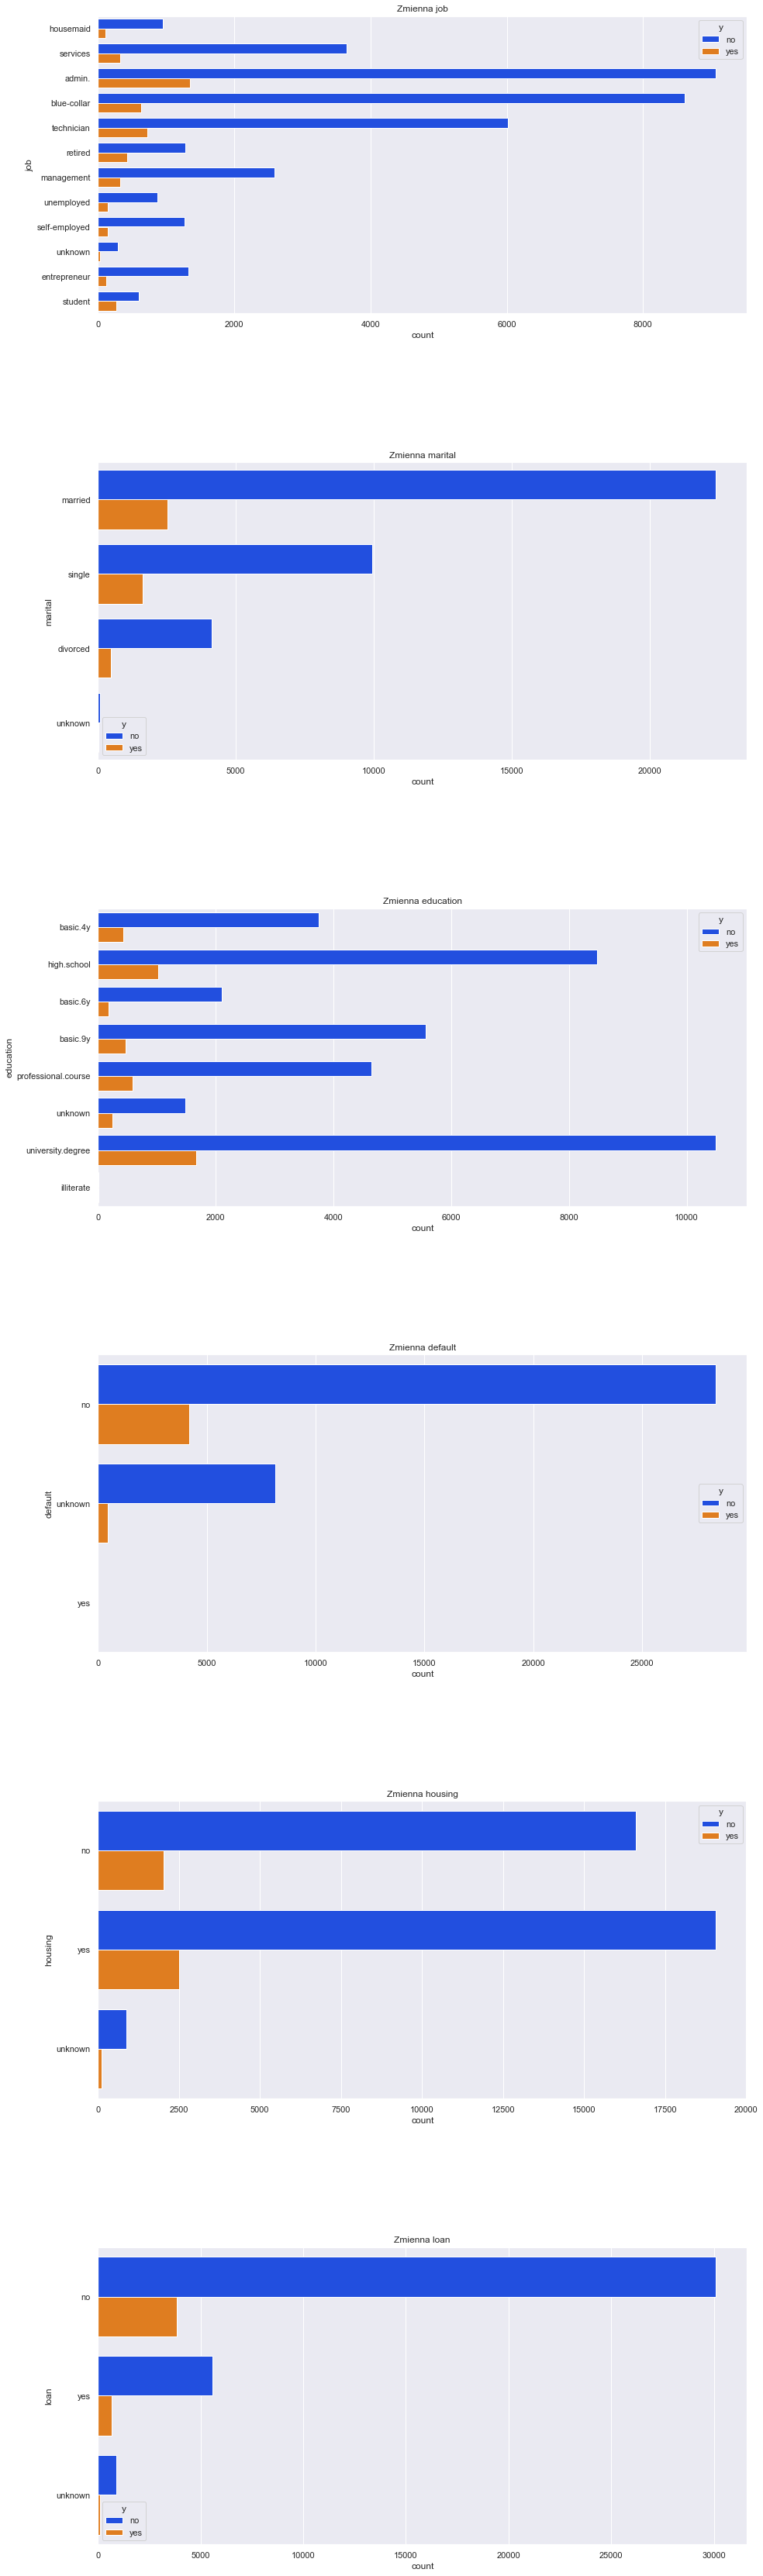

In [87]:
# Countplot
col1 = ['job', 'marital', 'education', 'default', 'housing', 'loan']

sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 60))
fig.subplots_adjust(hspace=.5)
plt.title('Countplot dla zmiennych kategorycznych')

for i, col in enumerate(col1):
    sns.countplot(y=col, data=data, hue='y', ax = ax[i])
    ax[i].set_title('Zmienna {}'.format(col))

<AxesSubplot:xlabel='age'>

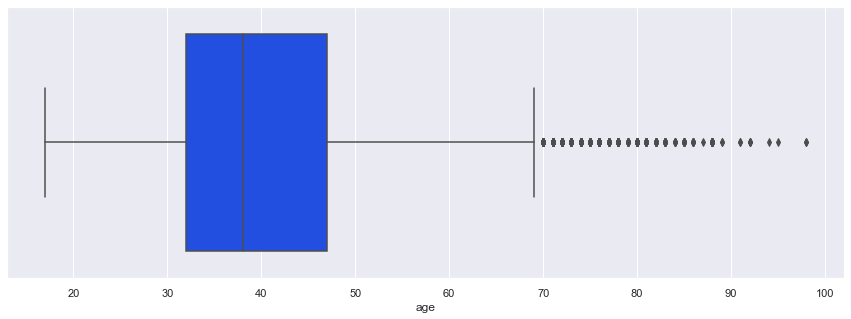

In [88]:
col2 = ['age']
sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5)) 

sns.boxplot(data=data, x=data['age'])

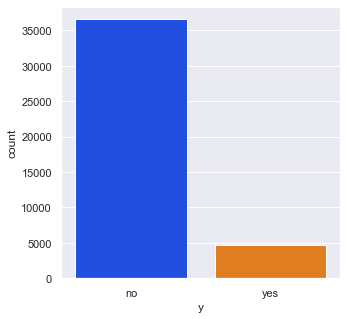

In [89]:
sns.set_theme(context='notebook', style='darkgrid', palette='bright')
fig =plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='y');

# Modelowanie


In [90]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, precision_score, recall_score

from sklearn import tree

In [91]:
#binaryzacja zmiennej celu
data['y_binarny'] = np.where(data['y'] == 'yes', 1, 0)
data = data.drop(['y'], axis=1)

In [92]:
#kodowanie zmiennych objaśniających_kategorycznych
#for col_ in col1:
    #data = data.join(pd.get_dummies(data[col_], drop_first=True, prefix=col_)).drop(col_, axis=1)

In [93]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(data[col1])

In [94]:
X_cat = enc.transform(data[col1])
X_cat.shape

(41188, 33)

In [95]:
X = np.concatenate((X_cat, data['age'].to_numpy().reshape(41188, 1)), axis=1)

In [96]:
y = data['y_binarny']

In [113]:
X[2]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0., 37.])

In [97]:
#Podział na zbiór uczący i testowy
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

## Model drzewa decyzyjnego

In [98]:
#Wybór modelu
model = DecisionTreeClassifier(random_state=0)

#Siatka parametrów
param_grid = {'max_depth' : [3, 4, 5],
              'min_samples_split' : [10, 20, 30],
              'min_samples_leaf' : [3, 6, 10]}

In [99]:
#Dobór optymalnych parametrów (siatka parametrów;walidacja krzyżowa - 3 części)
clf=GridSearchCV(model, param_grid, cv = 3, scoring='f1')

In [100]:
#Dopasowanie optymalnego modelu do zbioru uczącego
best_model=clf.fit(X_train, y_train)

#Parametry wybranego modelu
best_model.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [101]:
#Sprawdzenie modelu na zbiorze testowym
y_pred = best_model.predict(X_test)

In [139]:
aaa = X_test[best_model.predict_proba(X_test)[:, 1] > 0.5][10]

In [151]:
aaa = np.delete(aaa, 33)

In [153]:
enc.inverse_transform(aaa.reshape(-1, 33))

array([['retired', 'married', 'unknown', 'no', 'no', 'no']], dtype=object)

In [102]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

Text(0.5, 257.44, 'Predicted label')

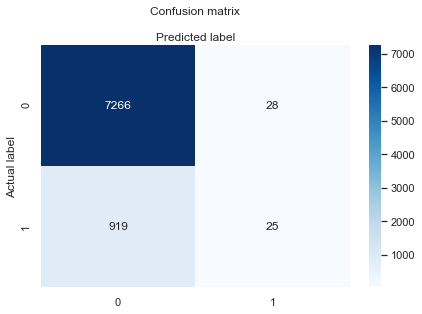

In [103]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [104]:
print("Wybrane metryki dla drzewa decyzyjnego")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-score:",metrics.f1_score(y_test, y_pred))

Wybrane metryki dla drzewa decyzyjnego
Accuracy: 0.8850449138140325
Precision: 0.4716981132075472
Recall: 0.026483050847457626
F1-score: 0.05015045135406218


Text(0.5, 1.0, 'Receiver Operating Characteristic')

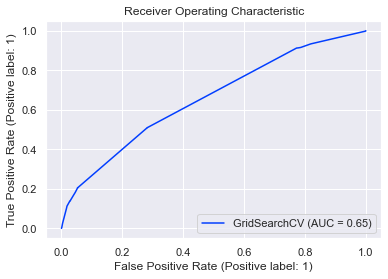

In [105]:
plot_roc_curve(best_model, X_test, y_test)
plt.title('Receiver Operating Characteristic')

In [106]:
best_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 6, 10],
                         'min_samples_split': [10, 20, 30]},
             scoring='f1')

In [107]:
import pickle

In [109]:
pickle.dump(best_model, open('predict_model.sav', 'wb'))
pickle.dump(enc, open('encoder.sav', 'wb'))